<a href="https://colab.research.google.com/github/abhi-11nav/Brain-stroke-prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset credits 

https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset




In [1]:
import pandas as pd
import numpy as np 

In [2]:
link_1 = "https://raw.githubusercontent.com/abhi-11nav/Brain-stroke-prediction/main/full_data.csv"

In [3]:
dataset = pd.read_csv(link_1)

In [4]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
dataset.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [6]:
dataset.shape

(4981, 11)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

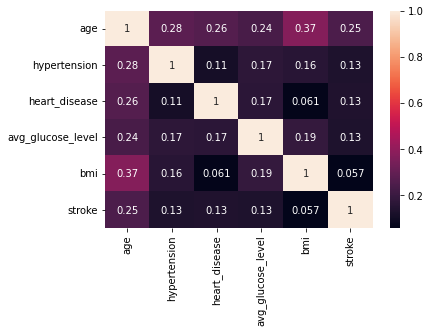

In [8]:
# Let us plot correlations for features in the dataset

sns.heatmap(dataset.corr(), annot=True)

We can say that there is no significant corrleation between features. So, there is nothing concerning

# Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


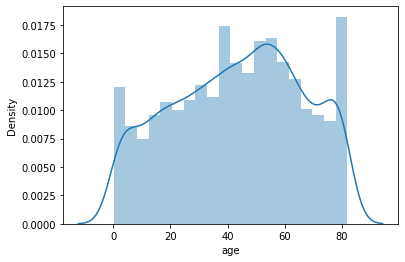

In [9]:
# Distribution of age feature 

sns.distplot(dataset["age"])

### Observation

The dataset somewhat resembles normal distribution . We will explore this later 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


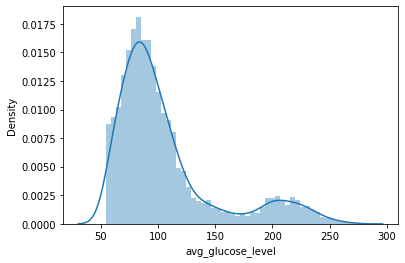

In [10]:
sns.distplot(dataset["avg_glucose_level"])

### Observation

Skewed to the right 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


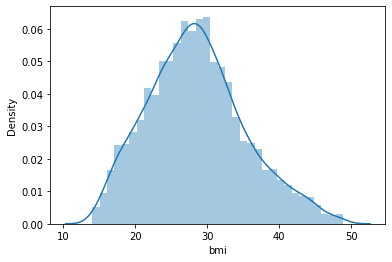

In [11]:
sns.distplot(dataset["bmi"])

### Observation

This feature data values follow a normal distribution 

In [12]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


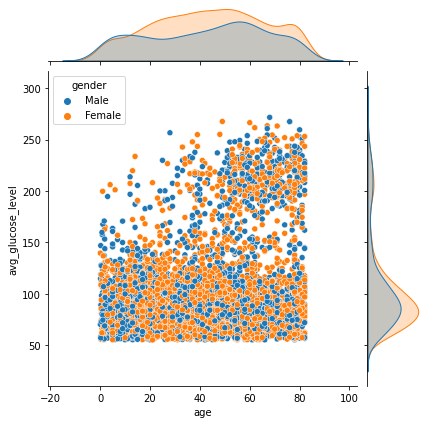

In [13]:
sns.jointplot(dataset["age"], dataset["avg_glucose_level"], hue=dataset["gender"])

It is rather unclear of the relation between age and average glucose levels. Let us find more about it by conducting an experiment


In [14]:
import scipy

from scipy.stats import pearsonr

Null hypothesis : The features have no relation 

Alternate hypothesis : The features have a relation

alpha_value = 0.05



In [15]:
correlation_coef, p_value = scipy.stats.pearsonr(dataset["age"],dataset["avg_glucose_level"])

if p_value<0.05:
  print("We reject the null hypothesis")
else:
  print("We accept the null hypothesis")

We reject the null hypothesis


We can say that we have a relation between these two variables, but we need to look at the correaltion coefficient to know the significance of the relation

In [16]:
correlation_coef

0.23676267568894818

## CONCLUSION:

We can say that both the features are related but there is no strong relation between them 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


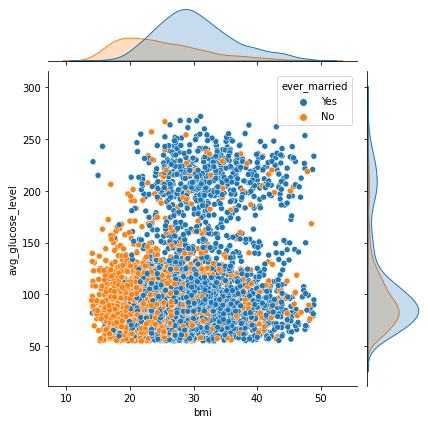

In [17]:
sns.jointplot("bmi", "avg_glucose_level",data=dataset,hue="ever_married")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


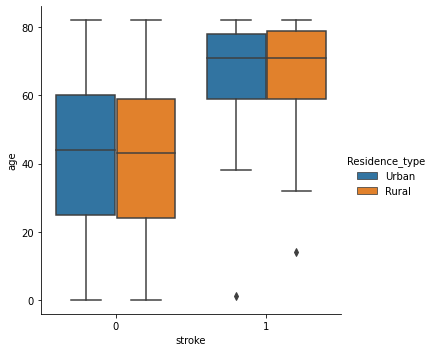

In [18]:
# Category plot  

sns.catplot("stroke","age",hue="Residence_type",data=dataset, kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


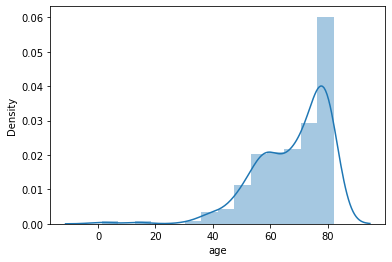

In [19]:
sns.distplot(dataset[dataset["stroke"]==1]["age"])

In [20]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


We can observe that people above the age of 40 suffered more strokes than younger people

## FEATURE ENCODING 

In [21]:
# Let us encode the categorical variables and convert them into numeric variables

## One hot encoding for gender, ever_married and Residence_type


dataset["gender"] = pd.get_dummies(dataset["gender"],drop_first=True) # Male = 1
dataset["Residence_type"] = pd.get_dummies(dataset["Residence_type"], drop_first=True) # Urban = 1
dataset["ever_married"] = pd.get_dummies(dataset["ever_married"], drop_first=True) # Yes = 1

In [22]:
# We are going to perform Label encoding on other two features

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [23]:
dataset["work_type"] = pd.DataFrame(encoder.fit_transform(dataset["work_type"]))
dataset["smoking_status"] = pd.DataFrame(encoder.fit_transform(dataset["smoking_status"]))

In [24]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [25]:
# Now let us divide the dataset into featuers and label 

X = dataset.drop("stroke",axis=1)
y = dataset["stroke"]

In [26]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## IMBALANCE IN OUTPUT FEATURE (LABEL)

In [28]:
# Checking for balance in dataset

dataset["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

We can see that there is clear imbalance in dataset

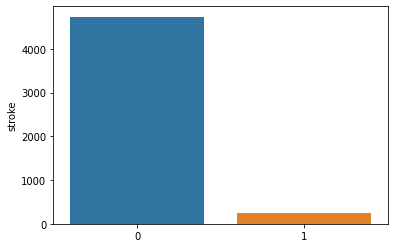

In [29]:
sns.barplot(x=dataset["stroke"].value_counts().index, y= dataset["stroke"].value_counts())

Clear imbalance spotted in the variable 

In [30]:
# Importing libraries for balancing the dataset

import imblearn

from imblearn.over_sampling import SMOTE

In [31]:
# Classifying the data according to storke

stroke_yes = dataset[dataset["stroke"]==1]
stroke_no = dataset[dataset["stroke"]==0]

In [32]:
print("yes: ",stroke_yes.shape,"no: ", stroke_no.shape)

yes:  (248, 11) no:  (4733, 11)


In [33]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [34]:
sampler = SMOTE(random_state=1)

train_X, train_y = sampler.fit_resample(train_X, train_y)

In [35]:
# Importing libraries for buildinig a model

import tensorflow as tf
from tensorflow import keras 

from keras.layers import Dense, Input, Dropout
from keras.models import Sequential, Model

In [36]:
model = keras.models.Sequential([
    Input(shape=X.shape[1:]),
    Dense(100, activation="relu"),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
    ])

In [37]:
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,501
Trainable params: 41,501
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_X, train_y, validation_data=([test_X, test_y]), epochs=200)

Epoch 1/200
222/222 [==============================] - 3s 6ms/step - loss: 0.4181 - accuracy: 0.8049 - val_loss: 0.4524 - val_accuracy: 0.7568
Epoch 2/200
222/222 [==============================] - 1s 4ms/step - loss: 0.3480 - accuracy: 0.8428 - val_loss: 0.3200 - val_accuracy: 0.8403
Epoch 3/200
222/222 [==============================] - 1s 5ms/step - loss: 0.3055 - accuracy: 0.8659 - val_loss: 0.4906 - val_accuracy: 0.7544
Epoch 4/200
222/222 [==============================] - 1s 5ms/step - loss: 0.2688 - accuracy: 0.8855 - val_loss: 0.4172 - val_accuracy: 0.8098
Epoch 5/200
222/222 [==============================] - 1s 3ms/step - loss: 0.2428 - accuracy: 0.9014 - val_loss: 0.4533 - val_accuracy: 0.8042
Epoch 6/200
222/222 [==============================] - 1s 2ms/step - loss: 0.2123 - accuracy: 0.9148 - val_loss: 0.4736 - val_accuracy: 0.8130
Epoch 7/200
222/222 [==============================] - 1s 2ms/step - loss: 0.1983 - accuracy: 0.9245 - val_loss: 0.4249 - val_accuracy: 0.8604

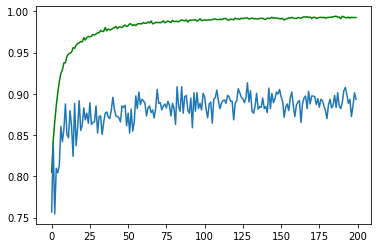

In [42]:
# Plotting the results 

plt.plot(history.history["accuracy"],color="green")
plt.plot(history.history["val_accuracy"])

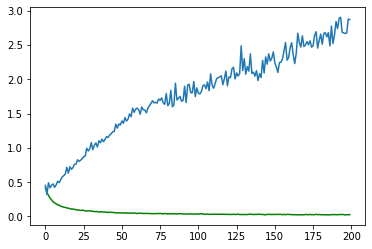

In [43]:
# Plotting the results 

plt.plot(history.history["loss"],color="green")
plt.plot(history.history["val_loss"])

In [ ]:
model.save("model.h5")

# HYPERPARAMETER TUNING


In [84]:
def build_model(n_hidden = 1, n_neurons=30, learning_rate=0.2, input_shape=X.shape[1]):
  model = keras.models.Sequential()

  option = {"input_shape": input_shape}

  for layer in range(n_hidden):
    options = {}
    model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
    
  model.add(keras.layers.Dense(1,**options))
  optimizer = keras.optimizers.SGD(learning_rate)

  model.compile(loss="binary_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
  return model 

In [85]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [86]:
keras_reg.fit(train_X,train_y, epochs=100, validation_data=[(test_X,test_y)], callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
212/222 [===========================>..] - ETA: 0s - loss: 7.5878 - accuracy: 0.5031WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor. Received: inputs=(<tf.Tensor 'IteratorGetNext:0' shape=(None, 10) dtype=float64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1) dtype=int64>). Consider rewriting this model with the Functional API.


222/222 [==============================] - 1s 2ms/step - loss: 7.5955 - accuracy: 0.5028 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
222/222 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
222/222 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
222/222 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
222/222 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
222/222 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
222/222 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 - val

In [87]:
from scipy.stats import reciprocal 

from sklearn.model_selection import RandomizedSearchCV

In [88]:
params = {
    "epochs":[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
    "learning_rate":[0.001,0.01,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
    "n_hidden":[0,1,2,3,4,5,6,7],
    "n_neurons":np.arange(30)
}

In [89]:
random_searchCV = RandomizedSearchCV(keras_reg, param_distributions=params, n_iter=10,cv=3)

In [90]:
random_searchCV.fit(train_X,train_y, epochs=100, validation_data=[(test_X,test_y)], callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
130/148 [=========================>....] - ETA: 0s - loss: 4.1687 - accuracy: 0.7243WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor. Received: inputs=(<tf.Tensor 'IteratorGetNext:0' shape=(None, 10) dtype=float64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1) dtype=int64>). Consider rewriting this model with the Functional API.


148/148 [==============================] - 1s 3ms/step - loss: 4.1924 - accuracy: 0.7230 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val

148/148 [==============================] - 3s 9ms/step - loss: 11.3724 - accuracy: 0.2535 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.250

148/148 [==============================] - 1s 2ms/step - loss: 9.9585 - accuracy: 0.3467 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728

148/148 [==============================] - 1s 3ms/step - loss: 4.5453 - accuracy: 0.6869 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.8260 - accuracy: 0.6797 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 7.3491 - accuracy: 0.5219 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 7.9027 - accuracy: 0.4876 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 7.9027 - accuracy: 0.4876 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 7.9027 - accuracy: 0.4876 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 7.9027 - accuracy: 0.4876 - val

148/148 [==============================] - 1s 3ms/step - loss: 3.8682 - accuracy: 0.7478 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val

148/148 [==============================] - 1s 2ms/step - loss: 4.3285 - accuracy: 0.7148 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 6.9611 - accuracy: 0.5360 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val

148/148 [==============================] - 1s 3ms/step - loss: 3.8331 - accuracy: 0.7507 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val

148/148 [==============================] - 1s 3ms/step - loss: 4.1957 - accuracy: 0.7243 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 7.2679 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val

148/148 [==============================] - 1s 3ms/step - loss: 11.3591 - accuracy: 0.2539 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.250

148/148 [==============================] - 1s 3ms/step - loss: 4.1421 - accuracy: 0.7243 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val

148/148 [==============================] - 1s 3ms/step - loss: 3.8169 - accuracy: 0.7488 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val

148/148 [==============================] - 1s 3ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.272

148/148 [==============================] - 1s 3ms/step - loss: 7.2392 - accuracy: 0.5231 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val

148/148 [==============================] - 1s 3ms/step - loss: 10.4604 - accuracy: 0.3143 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.250

148/148 [==============================] - 1s 3ms/step - loss: 9.5666 - accuracy: 0.3554 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2175 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.2176 - accuracy: 0.2728

148/148 [==============================] - 1s 3ms/step - loss: 7.1670 - accuracy: 0.5166 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 8.0628 - accuracy: 0.4773 - val

148/148 [==============================] - 1s 3ms/step - loss: 3.8392 - accuracy: 0.7459 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val

148/148 [==============================] - 1s 3ms/step - loss: 4.1636 - accuracy: 0.7243 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 7.2622 - accuracy: 0.5206 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 3ms/step - loss: 7.2783 - accuracy: 0.5227 - val

148/148 [==============================] - 1s 3ms/step - loss: 11.3886 - accuracy: 0.2522 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.250

148/148 [==============================] - 1s 3ms/step - loss: 4.2026 - accuracy: 0.7234 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 7.2905 - accuracy: 0.5210 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val

148/148 [==============================] - 1s 3ms/step - loss: 11.3785 - accuracy: 0.2518 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 3ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 3ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 3ms/step - loss: 11.4353 - accuracy: 0.2501 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 11.4353 - accuracy: 0.250

148/148 [==============================] - 2s 5ms/step - loss: 4.1389 - accuracy: 0.7251 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 1s 7ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 3ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.7272 - val

148/148 [==============================] - 1s 3ms/step - loss: 4.9868 - accuracy: 0.5605 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 7.2783 - accuracy: 0.5227 - val

148/148 [==============================] - 1s 3ms/step - loss: 0.5672 - accuracy: 0.7621 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 3.0769 - accuracy: 0.7581 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 3.8579 - accuracy: 0.7499 - val

222/222 [==============================] - 1s 2ms/step - loss: 7.6267 - accuracy: 0.4983 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
222/222 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
222/222 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
222/222 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
222/222 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
222/222 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
222/222 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000 - val

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0316aff7d0>,
                   param_distributions={'epochs': [10, 20, 30, 40, 50, 60, 70,
                                                   80, 90, 100, 110, 120, 130,
                                                   140, 150, 160, 170, 180, 190,
                                                   200],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.075, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5],
                                        'n_hidden': [0, 1, 2, 3, 4, 5, 6, 7],
                                        'n_neurons': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [91]:
random_searchCV.best_params_

{'epochs': 100, 'learning_rate': 0.075, 'n_hidden': 7, 'n_neurons': 7}

In [93]:
best_model = build_model(7,7,0.075,X.shape[1])

In [95]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(best_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
